In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [5]:
x=6*np.random.rand(200,1)-3
y=0.8*x**2+0.9*x+2+np.random.randn(200,1)

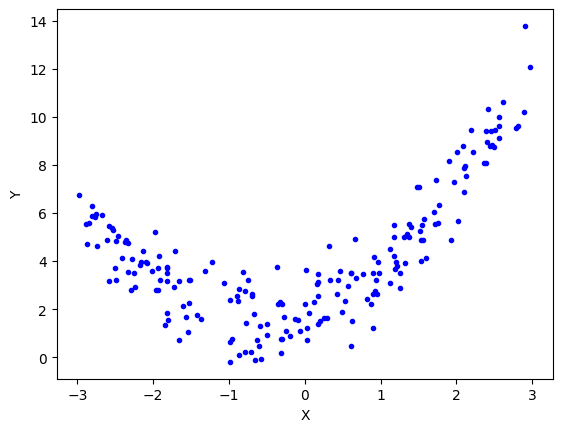

In [7]:
plt.plot(x,y,'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [9]:
lr=LinearRegression()

In [10]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [11]:
r2_score(y_test,y_pred)

0.015813868563025357

Text(0, 0.5, 'Y')

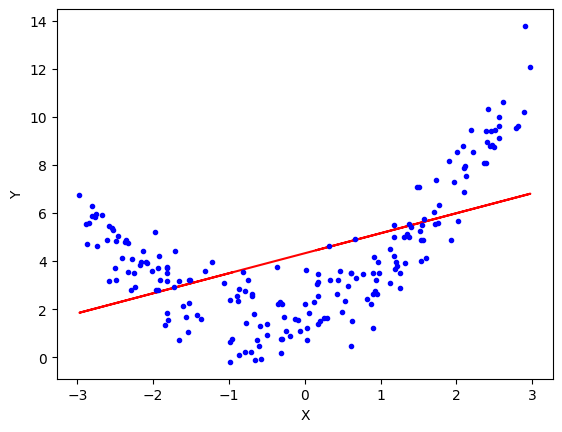

In [12]:
plt.plot(x_train,lr.predict(x_train),color='r')
plt.plot(x,y,'b.')
plt.xlabel("X")
plt.ylabel("Y")

In [14]:
poly=PolynomialFeatures(degree=2,include_bias=True)
x_train_trans=poly.fit_transform(x_train)
x_test_trans=poly.transform(x_test)

In [15]:
print(x_train[0])
print(x_train_trans[0])

[0.15652664]
[1.         0.15652664 0.02450059]


In [16]:
lr=LinearRegression()
lr.fit(x_train_trans,y_train)
y_pred=lr.predict(x_test_trans)

In [17]:
r2_score(y_test,y_pred)

0.8462154402879343

In [18]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.96146132 0.81137234]]
[1.93876498]


In [20]:
x_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly=poly.transform(x_new)
y_new=lr.predict(x_new_poly)

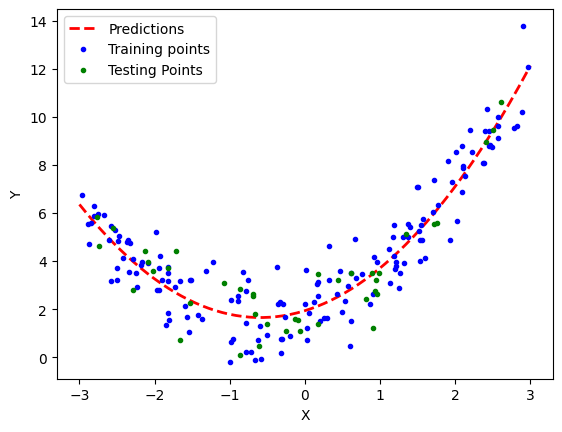

In [21]:
plt.plot(x_new,y_new,"r--",linewidth=2,label="Predictions")
plt.plot(x_train,y_train,"b.",label="Training points")
plt.plot(x_test,y_test,"g.",label="Testing Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()